In [1]:
import numpy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Mean and variance PDF of a Gaussian using ABC

## The mean

As an illustration of Approximate Bayesian Computation (ABC), we will infer first the mean and then the variance of a Gaussian. First we generate the mock data

In [2]:
data= numpy.random.normal(size=100)

First we assume that we know the variance and constrain the PDF for the mean. Let's write a simple function that samples the PDF using ABC. The sample mean is a sufficient statistic for the mean, so we will use that together with the absolute value of the difference between that and that of the simulated data as the distance function. We use a prior on the mean that is flat between -2 and 2:

In [3]:
def Mean_ABC(n=1000,threshold=0.05):
    out= []
    for ii in range(n):
        d= threshold+1.
        while d > threshold:
            m= numpy.random.uniform()*4-2.
            sim= numpy.random.normal(size=len(data))+m
            d= numpy.fabs(numpy.mean(sim)-numpy.mean(data))
        out.append(m)
    return out

Now we sample the PDF using ABC:

In [4]:
mean_pdfsamples_abc= Mean_ABC()

Let's plot this, as well as the analytical PDF

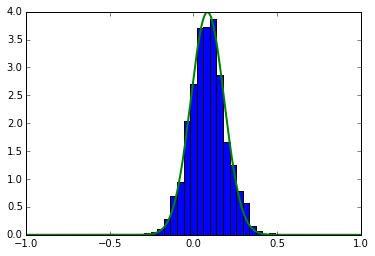

In [5]:
h= hist(mean_pdfsamples_abc,range=[-1.,1.],bins=51,normed=True)
xs= numpy.linspace(-1.,1.,1001)
plot(xs,numpy.sqrt(len(data)/2./numpy.pi)*numpy.exp(-(xs-numpy.mean(data))**2./2.*len(data)),lw=2.)

What happens when we make the threshold larger?

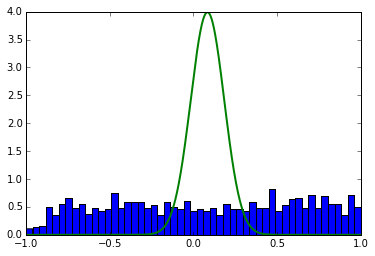

In [6]:
mean_pdfsamples_abc= Mean_ABC(threshold=1.)
h= hist(mean_pdfsamples_abc,range=[-1.,1.],bins=51,normed=True)
plot(xs,numpy.sqrt(len(data)/2./numpy.pi)*numpy.exp(-(xs-numpy.mean(data))**2./2.*len(data)),lw=2.)

That's not good! What if we make it smaller?

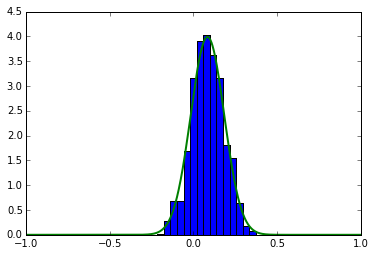

In [7]:
mean_pdfsamples_abc= Mean_ABC(threshold=0.001)
h= hist(mean_pdfsamples_abc,range=[-1.,1.],bins=51,normed=True)
plot(xs,numpy.sqrt(len(data)/2./numpy.pi)*numpy.exp(-(xs-numpy.mean(data))**2./2.*len(data)),lw=2.)

This runs very long, because it's difficult to find simulated data sets that are close enough to the true one.

## The variance

Let's know look at the variance, assuming that we know that the mean is zero. The sample variance is a sufficient statistic in this case and we can again write an ABC function, similar to that above:

In [8]:
def Var_ABC(n=1000,threshold=0.05):
    out= []
    for ii in range(n):
        d= threshold+1.
        while d > threshold:
            v= numpy.random.uniform()*4
            sim= numpy.random.normal(size=len(data))*numpy.sqrt(v)
            d= numpy.fabs(numpy.var(sim)-numpy.var(data))
        out.append(v)
    return out

We again run this to get the PDF and compare to the analytical one

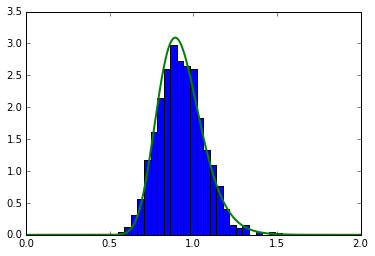

In [9]:
var_pdfsamples_abc= Var_ABC()
h= hist(var_pdfsamples_abc,range=[0.,2.],bins=51,normed=True)
xs= numpy.linspace(0.001,2.,1001)
ys= xs**(-len(data)/2.)*numpy.exp(-1./xs/2.*len(data)*(numpy.var(data)+numpy.mean(data)**2.))
ys/= numpy.sum(ys)*(xs[1]-xs[0])
plot(xs,ys,lw=2.)

What if we make the threshold larger?

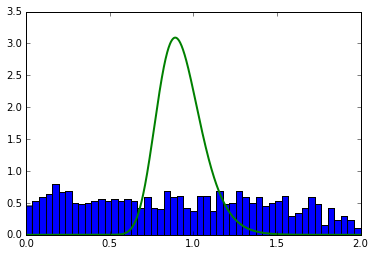

In [10]:
var_pdfsamples_abc= Var_ABC(threshold=1.)
h= hist(var_pdfsamples_abc,range=[0.,2.],bins=51,normed=True)
plot(xs,ys,lw=2.)

That's not good! What if we make the threshold smaller?

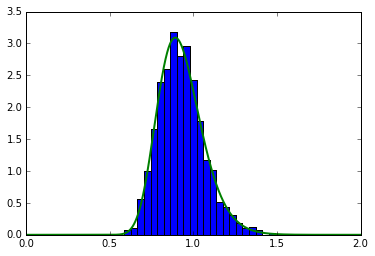

In [11]:
var_pdfsamples_abc= Var_ABC(threshold=0.005)
h= hist(var_pdfsamples_abc,range=[0.,2.],bins=51,normed=True)
plot(xs,ys,lw=2.)